In [28]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Fitting Model
from sklearn.linear_model import LogisticRegression

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head(3)
#Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
#Continous: Age, Fare. Discrete: SibSp, Parch.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
train_data.describe()
#平均存活率約38%
#年齡的數據有缺失值(NaN)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.describe(include=['O']) #統計str type資料
#上船地點有缺失值

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sage, Miss. Stella Anna",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


D:\Program Files (x86)\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


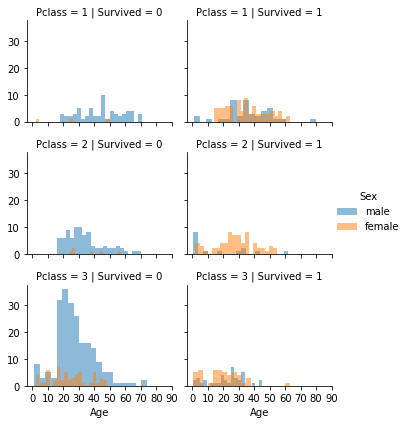

In [7]:
plot_1 = sns.FacetGrid(train_data, col='Survived', row='Pclass',hue='Sex' ,size=2, aspect=1.2)
plot_1.map(plt.hist, 'Age', alpha=0.5,bins=20)
plot_1.set(xticks=[i*10 for i in range(10)])
train_data[['Sex','Pclass', 'Survived']].groupby(['Pclass','Sex'], as_index=False).mean()
plot_1.add_legend()
#女性存活率高於男性
#Class1男性的存活率高於其他class

In [8]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values('Survived',ascending=False)
#船上家人(父母、子女)的數量對存活率的影響

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [9]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values('Survived',ascending=False)
#船上家人(兄弟姊妹，配偶)的數量對存活率的影響

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


D:\Program Files (x86)\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Program Files (x86)\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


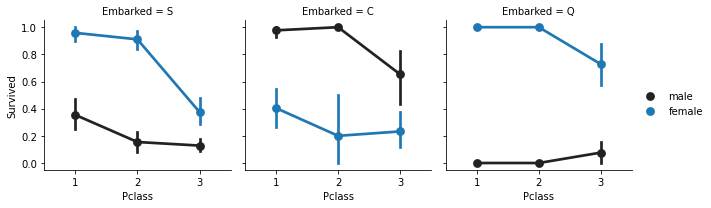

In [10]:
plot_2 = sns.FacetGrid(train_data, col='Embarked')
plot_2.map(sns.pointplot,'Pclass','Survived','Sex')
plot_2.add_legend()
#男女的存活率在上船地點為Cherbourg出現反轉

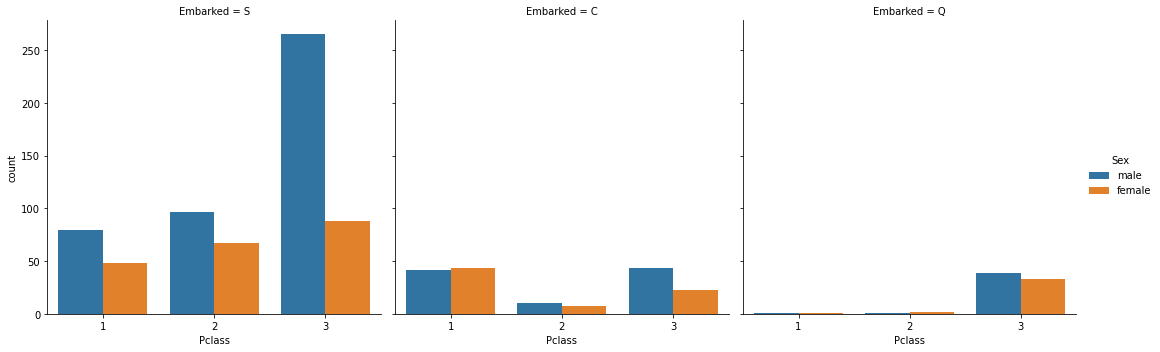

In [11]:
sns.catplot(x="Pclass", hue="Sex", col="Embarked", data=train_data, kind="count")
#無明顯趨勢指出由Cherbourg上船的女性死亡率與艙等有相關

D:\Program Files (x86)\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


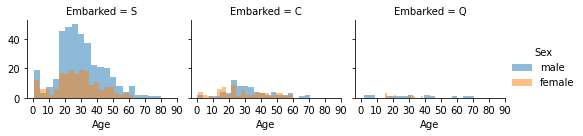

In [12]:
plot_1 = sns.FacetGrid(train_data, col='Embarked',hue='Sex' ,size=2, aspect=1.2)
plot_1.map(plt.hist, 'Age', alpha=0.5,bins=20)
plot_1.set(xticks=[i*10 for i in range(10)])
train_data[['Sex','Pclass', 'Survived']].groupby(['Pclass','Sex'], as_index=False).mean()
plot_1.add_legend()
#無明顯趨勢指出由Cherbourg上船的女性死亡率與年齡有相關

In [13]:
train_data = train_data.drop(['PassengerId','Name','Cabin','Ticket'], axis=1)
train_data.shape, test_data.shape

((891, 8), (418, 11))

In [14]:
#將性別(str)轉為數值特徵(int)
gender_map={'male':0, 'female':1}
train_data['Sex'] = train_data['Sex'].map(gender_map).astype(int)

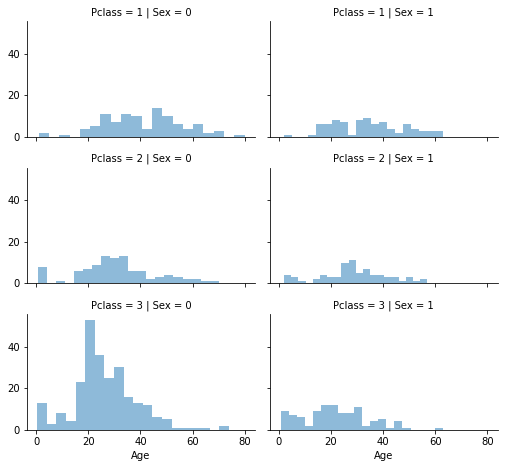

In [15]:
#Missing value的處理: 解決Age欄位數值缺失的問題
#可參考http://jntnu.ord.ntnu.edu.tw/Uploads/Papers/634690645971617572.pdf
#從下圖可以發現不同艙等、性別組合下的年齡分布不一致
grid = sns.FacetGrid(train_data, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20).add_legend()
#以迴歸插補法，以艙等Pclass及性別Sex作為相關特徵去補上年齡

In [16]:
#找出上圖各組合的中位數去取代缺失值
guess_age_array = np.zeros((3,2)) #創建一個2*3矩陣存放不同組合下年齡的中位數
for pclass in range(3):
    for sex in range(2):
        age_median = train_data[train_data['Pclass'] == pclass + 1 ][train_data['Sex'] == sex]['Age'].median() #實際上Pclass是從1~3
        guess_age_array[pclass][sex] = age_median
guess_age_array

<ipython-input-16-a065c4c525b0>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age_median = train_data[train_data['Pclass'] == pclass + 1 ][train_data['Sex'] == sex]['Age'].median() #實際上Pclass是從1~3


array([[40. , 35. ],
       [30. , 28. ],
       [25. , 21.5]])

In [17]:
#把guess_age_array的數值填回
for pclass in range(3):
    for sex in range(2):
        train_data.loc[(train_data.Age.isnull()) & (train_data.Sex == sex) & (train_data.Pclass == pclass + 1), 'Age'] \
        = guess_age_array[pclass,sex]

In [18]:
#確認年齡皆已補上(無NaN值)
train_data.Age.count()

891

In [19]:
train_data.Embarked.unique() #array(['S', 'C', 'Q', nan], dtype=object) 代表艙位有缺失值
most_freq_embarked = train_data.Embarked.mode()[0] #找出最常出現艙位為S艙
train_data['Embarked'] = train_data['Embarked'].fillna(most_freq_embarked)
embarked_map={'S':0, 'C':1, 'Q':2}
train_data['Embarked'] = train_data['Embarked'].map(embarked_map).astype(int)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,21.5,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [20]:
#處理完train data後接著要處理test data
test_data = test_data.drop(['PassengerId','Name','Cabin','Ticket'], axis=1)
test_data['Sex'] = test_data['Sex'].map(gender_map).astype(int)
for pclass in range(3):
    for sex in range(2):
        test_data.loc[(test_data.Age.isnull()) & (test_data.Sex == sex) & (test_data.Pclass == pclass + 1), 'Age'] \
        = guess_age_array[pclass,sex]
test_data['Embarked'] = test_data['Embarked'].map(embarked_map).astype(int)
test_data['Fare'].fillna(test_data['Fare'].median(),inplace=True)
test_data
#針對較小量的數據，我認為比較好的做法是用一個矩陣將train_data跟test_dat包起來
#e.q combine = [train_data, test_data]再同步做data wrangling

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,25.0,0,0,8.0500,0
414,1,1,39.0,0,0,108.9000,1
415,3,0,38.5,0,0,7.2500,0
416,3,0,25.0,0,0,8.0500,0


In [21]:
test_data['Fare'].fillna(test_data['Fare'].median(),inplace=True)

In [22]:
x_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
x_test = test_data
x_train.shape, y_train.shape, x_test.shape

((891, 7), (891,), (418, 7))

In [30]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
Y_pred = log_reg.predict(x_test)
acc_log = round(log_reg.score(x_train, y_train) * 100, 2)
acc_log

D:\Program Files (x86)\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


80.92